# EDA

### Additional Data Enhancements
These columns were added using excel and some research

- **Coach**: Identifies the head coach for each team during the match.
- **CoachChange**: Binary indicator (0 = No, 1 = Yes) showing whether a coaching change occurred before the match.
- **Change_Timing**: Categorizes coaching changes as Before Season, Mid Season, or Late Season to differentiate when the transition happened.
- **Team_Strength & Opponent_Strength**: Squad values used as a proxy for team quality.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/alesandro/Downloads/matches_corrected.csv"
df = pd.read_csv(file_path)

### BASIC DATA CHECKS ###
# Display basic info
print("Dataset Info:")
df.info()

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         760 non-null    int64  
 1   Date               760 non-null    object 
 2   Time               760 non-null    object 
 3   Comp               760 non-null    object 
 4   Round              760 non-null    object 
 5   Day                760 non-null    object 
 6   Venue              760 non-null    object 
 7   Result             760 non-null    object 
 8   GF                 760 non-null    int64  
 9   GA                 760 non-null    int64  
 10  Opponent           760 non-null    object 
 11  xG                 760 non-null    float64
 12  xGA                760 non-null    float64
 13  Poss               760 non-null    int64  
 14  Attendance         760 non-null    int64  
 15  Captain            760 non-null    object 
 16  Formation   

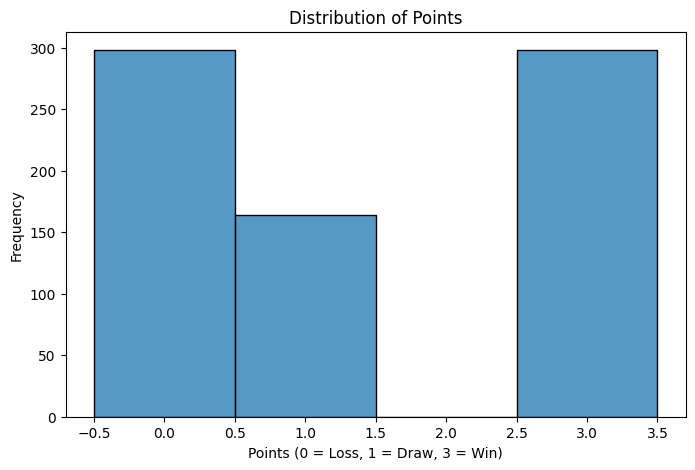

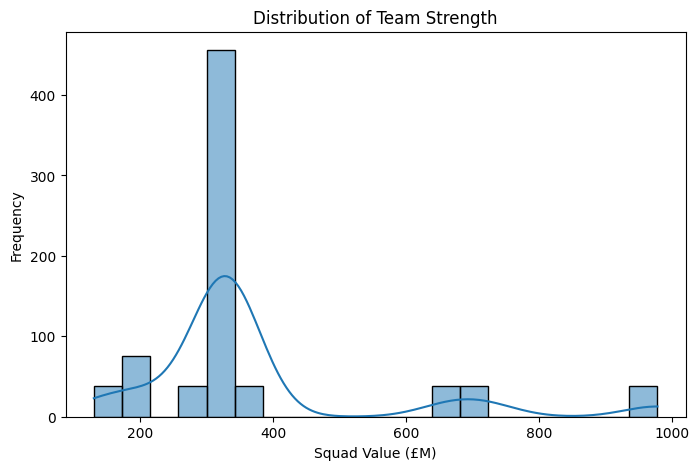

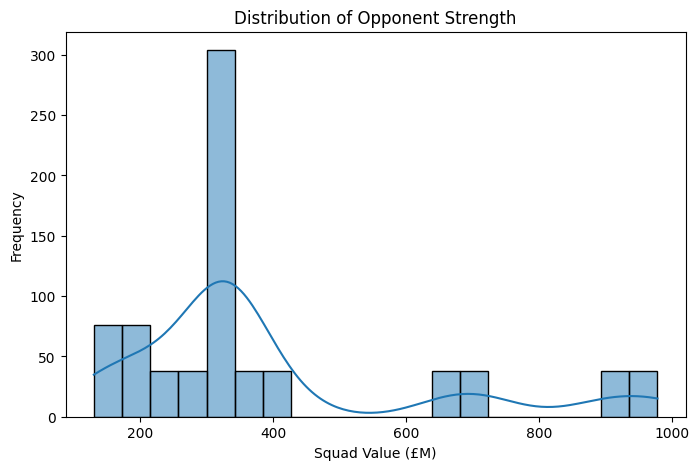

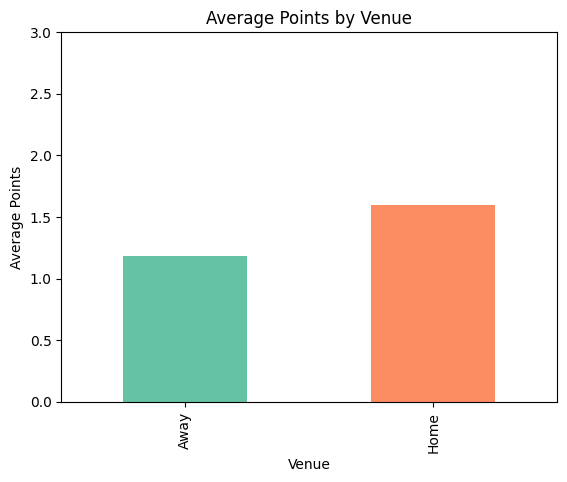

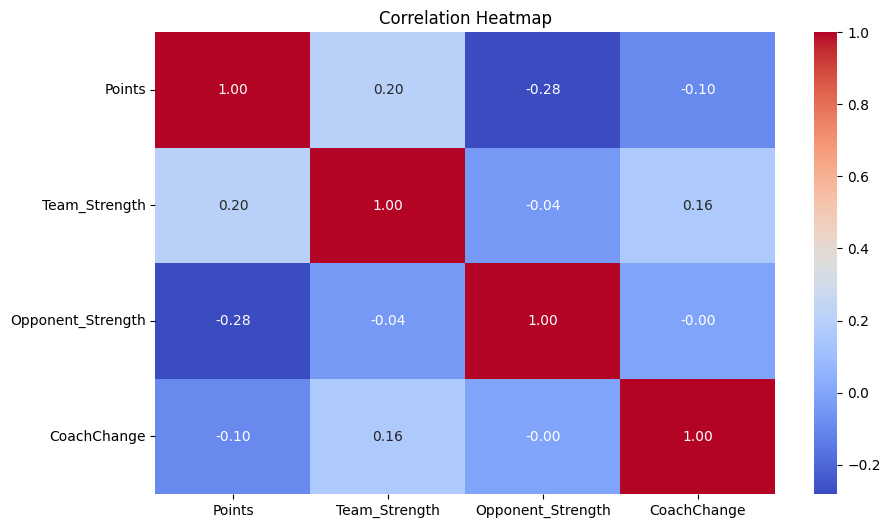

<positron-console-cell-4>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



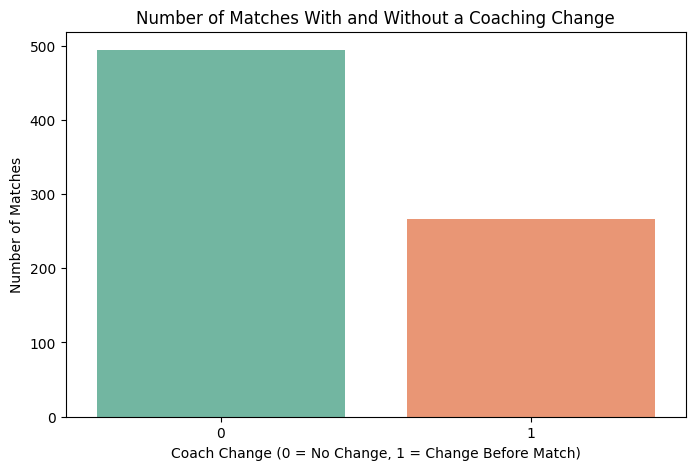

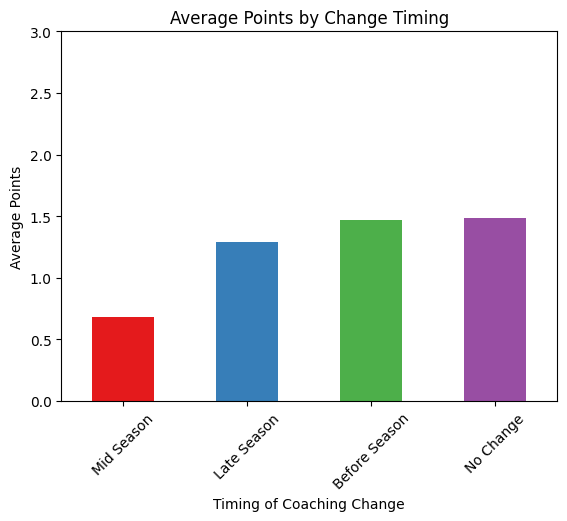

In [4]:
### DISTRIBUTION PLOTS ###

# Points Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Points"], bins=[-0.5, 0.5, 1.5, 3.5], discrete=True)
plt.title("Distribution of Points")
plt.xlabel("Points (0 = Loss, 1 = Draw, 3 = Win)")
plt.ylabel("Frequency")
plt.show()

# Team Strength Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Team_Strength"], bins=20, kde=True)
plt.title("Distribution of Team Strength")
plt.xlabel("Squad Value (£M)")
plt.ylabel("Frequency")
plt.show()

# Opponent Strength Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Opponent_Strength"], bins=20, kde=True)
plt.title("Distribution of Opponent Strength")
plt.xlabel("Squad Value (£M)")
plt.ylabel("Frequency")
plt.show()

venue_means = df.groupby("Venue")["Points"].mean()
venue_means.plot(kind="bar", color=["#66c2a5", "#fc8d62"])
plt.title("Average Points by Venue")
plt.ylabel("Average Points")
plt.xticks([0, 1], ["Away", "Home"])
plt.ylim(0, 3)
plt.show()


### CORRELATION ANALYSIS ###
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[["Points", "Team_Strength", "Opponent_Strength", "CoachChange"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

### CATEGORICAL ANALYSIS ###

# Countplot for Coaching Changes
plt.figure(figsize=(8, 5))
sns.countplot(x="CoachChange", data=df, palette="Set2")
plt.title("Number of Matches With and Without a Coaching Change")
plt.xlabel("Coach Change (0 = No Change, 1 = Change Before Match)")
plt.ylabel("Number of Matches")
plt.show()

timing_means = df.groupby("Change_Timing")["Points"].mean().sort_values()
timing_means.plot(kind="bar", color=sns.color_palette("Set1"))
plt.title("Average Points by Change Timing")
plt.ylabel("Average Points")
plt.xlabel("Timing of Coaching Change")
plt.xticks(rotation=45)
plt.ylim(0, 3)
plt.show()



- The **points distribution** confirms the expected trimodal pattern (0, 1, and 3 points), aligning with the Premier League point system where a win earns 3 points, a draw earns 1, and a loss earns 0. The data shows an even spread of wins and losses, with fewer draws.

- **Team strength and opponent strength distributions** reveal a right-skewed pattern. A few teams have extremely high squad values, while most are clustered in a mid-range. This supports using market value as a proxy for team quality, but also hints at inequality in team resources.

- The **average points by venue** chart confirms home-field advantage: teams playing at home earn more points on average (around 1.6) compared to when they play away (around 1.2). This justifies including venue as a confounding variable in the causal model.

- The **correlation heatmap** shows a modest positive relationship between team strength and points (~0.20), and a negative one between opponent strength and points (~-0.28). Coaching changes show a weaker negative correlation with points (~-0.10), suggesting limited direct influence.

- The **distribution of coaching changes** shows that most matches were played without a recent coaching change (~500 games), while fewer (~260) had a coaching change beforehand. This reflects how coaching changes are relatively infrequent but not rare in the dataset.

- The **average points by change timing** bar chart suggests that **mid-season coaching changes are associated with the lowest average points**, supporting the idea that they may be reactive (in response to poor form) rather than transformative. Teams that changed coaches before or late in the season performed similarly to teams that didn’t change coaches.

- **Overall**, the data supports the idea that team strength and opponent difficulty are stronger performance drivers than coaching changes. Coaching switches appear more reactive than strategic. That said, **some of the variables used in this exploratory analysis were manually created in Excel** — like the change timing column — and may need to be reviewed to ensure accuracy and clarity. This will likely be a next step.
